In [1]:
from paddleocr import PaddleOCR, draw_ocr # main OCR dependencies
from matplotlib import pyplot as plt # plot images
import matplotlib.image
import cv2 #opencv
import os

In [31]:

class PaddleModel:
    
    def __init__(self):
        self.ocr_model = PaddleOCR(lang='en')

    def detect(self, path):
        
        result = self.ocr_model.ocr(path)
        texts = [res[1][0] for res in result[0]]
        
        return texts
        

        


In [32]:
ob = PaddleModel()
ob.detect("samples/test3.jpeg")

[2023/04/21 10:44:07] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/satish/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/satish/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_pa

['TN38CY4658']

In [33]:
from ultralytics import YOLO

model = YOLO('models/best.pt')
ocr_model = PaddleModel()

[2023/04/21 10:45:42] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/satish/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/satish/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_pa


0: 640x480 1 licence, 2752.7ms
Speed: 1.6ms preprocess, 2752.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


[2023/04/21 10:47:28] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/04/21 10:47:30] ppocr DEBUG: dt_boxes num : 1, elapse : 1.1390559673309326
[2023/04/21 10:47:30] ppocr DEBUG: rec_res num  : 1, elapse : 0.19365668296813965


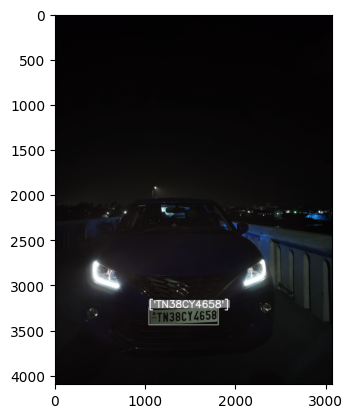

In [35]:
from ultralytics import YOLO
import cv2
from ultralytics.yolo.utils.plotting import Annotator

img_path = 'samples/test3.jpeg'

img = cv2.imread(img_path)

results = model.predict(img)

for r in results:
    annotator = Annotator(img)
    
    boxes = r.boxes
    for box in boxes:
        
        b = box.xyxy[0]  
        number_plate = ocr_model.detect(img_path)
        annotator.box_label(b, str(number_plate))
        
frame = annotator.result()  
plt.imshow(frame)       
